<a href="https://colab.research.google.com/github/nomccc/PA-Data-Mining/blob/main/datmin_pa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import math
import pylab as pl
from math import sqrt, pi, exp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from wordcloud import WordCloud, STOPWORDS
import csv

In [ ]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv") # Supervised
movies = pd.read_csv("movies_metadata.csv") # Usupervised


<ipython-input-176-b87d64571180>:2: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
len(stroke)

5110

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
len(movies)

45466

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

<Axes: xlabel='gender', ylabel='count'>

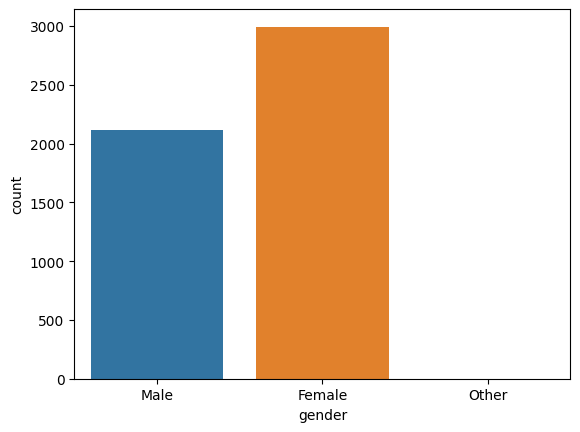

In [ ]:
sns.countplot(data=stroke,x="gender")

In [ ]:
px.histogram(stroke,x="gender")

In [ ]:
tes = stroke.gender.value_counts().reset_index()
tes

,index,gender
0,Female,2994
1,Male,2115
2,Other,1


tes

([<matplotlib.patches.Wedge at 0x7f6d482e91e0>,
 [Text(-0.2932923170393164, 1.0601790493901062, 'Female'),
  Text(0.2926404138262685, -1.0603591788613849, 'Male'),
  Text(1.099999792043413, -0.0006763907511957427, 'Other')])

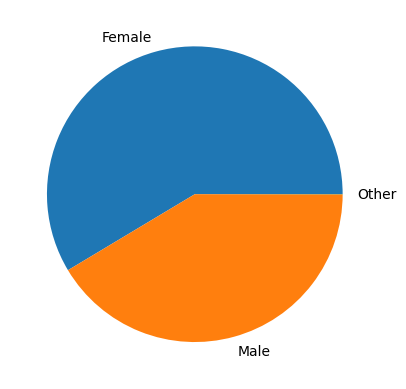

In [ ]:
plt.pie(labels=tes["index"],x=tes["gender"])

# Supervised

**Supervised** merupakan proses pengolahan data dengan model algoritma jenis klasifikasi. Proses klasifikasinya sendiri dimulai dari memprediksikan kelas pada titik data dan untuk kelas-kelas tersebut sering disebut juga sebagai label, target, dan kategori.


## Business Understanding

### - Business Objective


**Tujuan pemakaian data mining** ialah berdasarkan jenis data yaitu supervised sehingga penerapan materi data mining pada kasus untuk mendapatkan hasil prediksi dari data pasien yang kemungkinan terkena stroke dengan memperhatikan atribbut tertentu seperti usia,jenis kelamin,penyakit bawaan, dan status merokok. Atribut-atribut tersebut digunakan sebagai analisis dari penyebab atau faktor dari stroke. Setelah mengetahui faktor apa saja yang dapat mempengaruhi penyakit stroke dari hasil prediksi maka, informasi tersebut dapat dijakdikan sebagai kajian yang dapat dimanfaatkan untuk pencegahan penyakit stroke ke masyarakat.

**Tujuan dari penggunaan dataset** berdasarkan data yang didapatkan dari studi kasus ialah dengan tujuan agar data yang akan digunakan tersebut tersimpan secara lebih terstruktur, mudah untuk ditemukan berdasarkan atributnya, mudah untuk dikelola menjadi informasi dengan penerapan materi data mining, dan dapat mengetahui hubungan antar atribut yang ada pada data.

### - Assess Situasion

**Situasi dari studi kasus:**

Menurut WHO stroke merupakan penyebab kematian ke-2 di dunia dengan persentase sekita 11%. Berdasarkan faktor dari situasi tersebut maka diperlukan suatu data yang dapat digunakan untuk : 
*   Mengindentifikasi Permasalahan
Stroke merupakan penyebab kematian ke-2 yang kemungkinan bisa disebabkan faktor :
1. Pola Makan Yang Tidak Sehat
Pola makan yang tidak sehat seperti terlalu banyak mengkonsumsi gula dapat meningkatkan resiko stroke.
2. Istirahat Kurang
Dengan istirahat yang kurang akan menimbulkan daya tahan tubuh menurun dengan diikuti aktivitas yang banyak menyebabkan stress sehingga tubuh renta atau memiliki risiko tinggi stroke.
3. Perokok
Merokok merupakan kebiasaan buruk dan dapat menimbulkan stroke serta penyakit lainnya.
4. Hipertensi
Hipertensi adalah kondisi dengan tekanan darah yang tinggi sekitar 70% penderita stroke disebabkan oleh kondisi ini.
5. Memiliki Riwayat Penyakit Jantung
Kemungkinan beberapa obat yang dikonsumsi untuk pengobatan jantu dapat meningkatkan risiko stroke perdarahan.

*   Membuat Level Permasalahan
Berdasarkan hasil identifikasi dari penjelasan diatas didapatkan level permasalahan sebagai berikut :
1. Hipertensi
2. Istirahat Kurang
3. Perokok
4. Memiliki Riwayat Penyakit Jantung
5. Pola Makan Yang Tidak Sehat

*   Mencari Solusi
Solusi yang bisa dilakukan untuk menurunkan risiko stroke adalah :
1. Mengikuti penyuluhan terkait bahayanya penyakit stroke terutama untuk orang tua,karena lebih rentan terkena stroke walaupun dapat memungkikan juga terjadi pada anak muda.
2. Mengkonsumsi makanan yang sehat dan secukupnya.
3. Menyempatkan untuk istirahat walaupun sebentar.
4. Menjaga pola hidup yang sehat terutama bagi perokok diharapkan untuk mengurangi bahkan berhenti demi kesehatan tubuh.

**Situasi dari projek:**

1. Memerlukan kerjasama dalam mengolah data ini.
2. Tidak memerlukan storage yang lebih karena data hanya berukuran 69 mb.

**Hasil dari projek:**
1. Mendapatkan hasil prediksi pasien yang terkena stroke.
2. Mengetahui faktor apa saja yang dapat mempengaruhi penyakit stroke.
3. Mampu menerapkan materi data mining dengan baik.

### - Data Mining Goals

Memprediksi kasus stroke pada pasien dengan menggunakan data yang telah didapatkan dari sumber. Prediksi yang dilakukan ialah melakukan perkiraan dari beberapa variabel seperti usia, jenis kelamin, dan status merokok sehingga didapatkan pola yang ditemukan dalam data.

### - Project Plan



*   Projek ini direncanakan untuk memprediksi kasus stroke pada pasien dengan faktor apa saja.
*   Projek ini dikerjakan selama kurang lebih satu bulan dengan menggunakan bantuan tools VSCode, Google Collab, Jupiter Notebook, dan Python.
*   Tim yang bekerja pada projek ini adalah:
1.  Dzakiroh Nawaal Nabilah (003)
2.  Ahmad Lutfi (009)
3.  Nur Avivah (010)
4.  Agus Tri Setyowati (011)
*   Projek ini dikerjakan secara bersama namun membagi tugas sesuai tahap-tahap yang dibutuhkan kemudian akan dievaluasi bersama jika pekerjaan masing-masing dari kami telah selesai.
*   Projek ini dikerjakan dengan menggunakan penerepan CRISP-DM  sebagai salah satu standar untuk menghasilkan data yang berkualitas.








## Data Understanding

### Initial Data

Dataset didapat dari website Kaggle dengan juduk "Stroke Prediction Dataset" oleh Fedesoriano.<br> link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/code?datasetId=1120859&sortBy=voteCount

In [ ]:
#mengimport dataset
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

### Describe Data

Data terdiri dari 12 kolom atribut dan baris data sebanyak 5009 data. <br>
1.**id**: pengidentifikasi unik. <br>
2.**gender**: "Male", "Female", dan "Other" <br>
3.**age**: umur pasien <br>
4.**hypertention**: 0 jika pasien tidak hipertensi, jika pasien mengidap hipertensi <br>
5.**heart_disease**: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung<br>
6.**ever_married**: status pernikahan <br>
7.**wrok_type**: "children", "govt_jov", "never_worked", "private", atau "self_employed" <br>
8.**residence_type**: "rural" atau "urban" <br>
9.**avg_glucose_level**: level kadar gula pasien <br>
10.**bmi**: body mass index <br>
11.**smoking_status**: "formerly smoked", "never_smoked, "smoked", "unknown" <br>
12.**stroke**: 1 jika pasien penderita stroke, 0 jika pasien tidak menderita stroke <br>

### Explore Data

Mengeksplor ke dalam data seperti memvisualisasikan, mengidentifikasi hubungan antar variabel, dann meng-query-kan

In [ ]:
#melihat summary dari data
str(stroke)

'         id  gender   age  hypertension  heart_disease ever_married  \\\n0      9046    Male  67.0             0              1          Yes   \n1     51676  Female  61.0             0              0          Yes   \n2     31112    Male  80.0             0              1          Yes   \n3     60182  Female  49.0             0              0          Yes   \n4      1665  Female  79.0             1              0          Yes   \n...     ...     ...   ...           ...            ...          ...   \n5105  18234  Female  80.0             1              0          Yes   \n5106  44873  Female  81.0             0              0          Yes   \n5107  19723  Female  35.0             0              0          Yes   \n5108  37544    Male  51.0             0              0          Yes   \n5109  44679  Female  44.0             0              0          Yes   \n\n          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \\\n0           Private          Urban             228

In [ ]:
#melihat 5 data terawal
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#melihat 5 data terakhir
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
#untuk melihat bentuk dari dataset
stroke.shape

(5110, 12)

In [ ]:
#melihat ukuran dataset
stroke.size

61320

In [ ]:
#melihat informasi dari data yang ada
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#ngecek data yang masih ada nilai null
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#melihat persentase data yang null
hitung = 0
for i in stroke.isnull().sum(axis=1):
    if i>0:
        hitung+=1

print('total data yang ada nilai null: ', hitung)


total data yang ada nilai null:  201


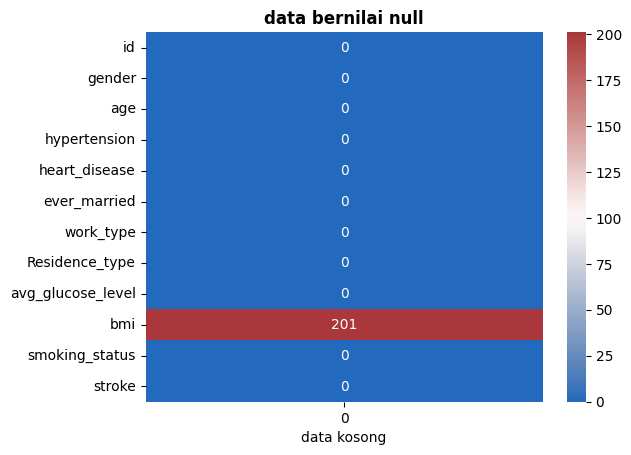

In [ ]:
plt.title('data bernilai null',fontweight='bold')
ax = sns.heatmap(stroke.isnull().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('data kosong')
plt.show()

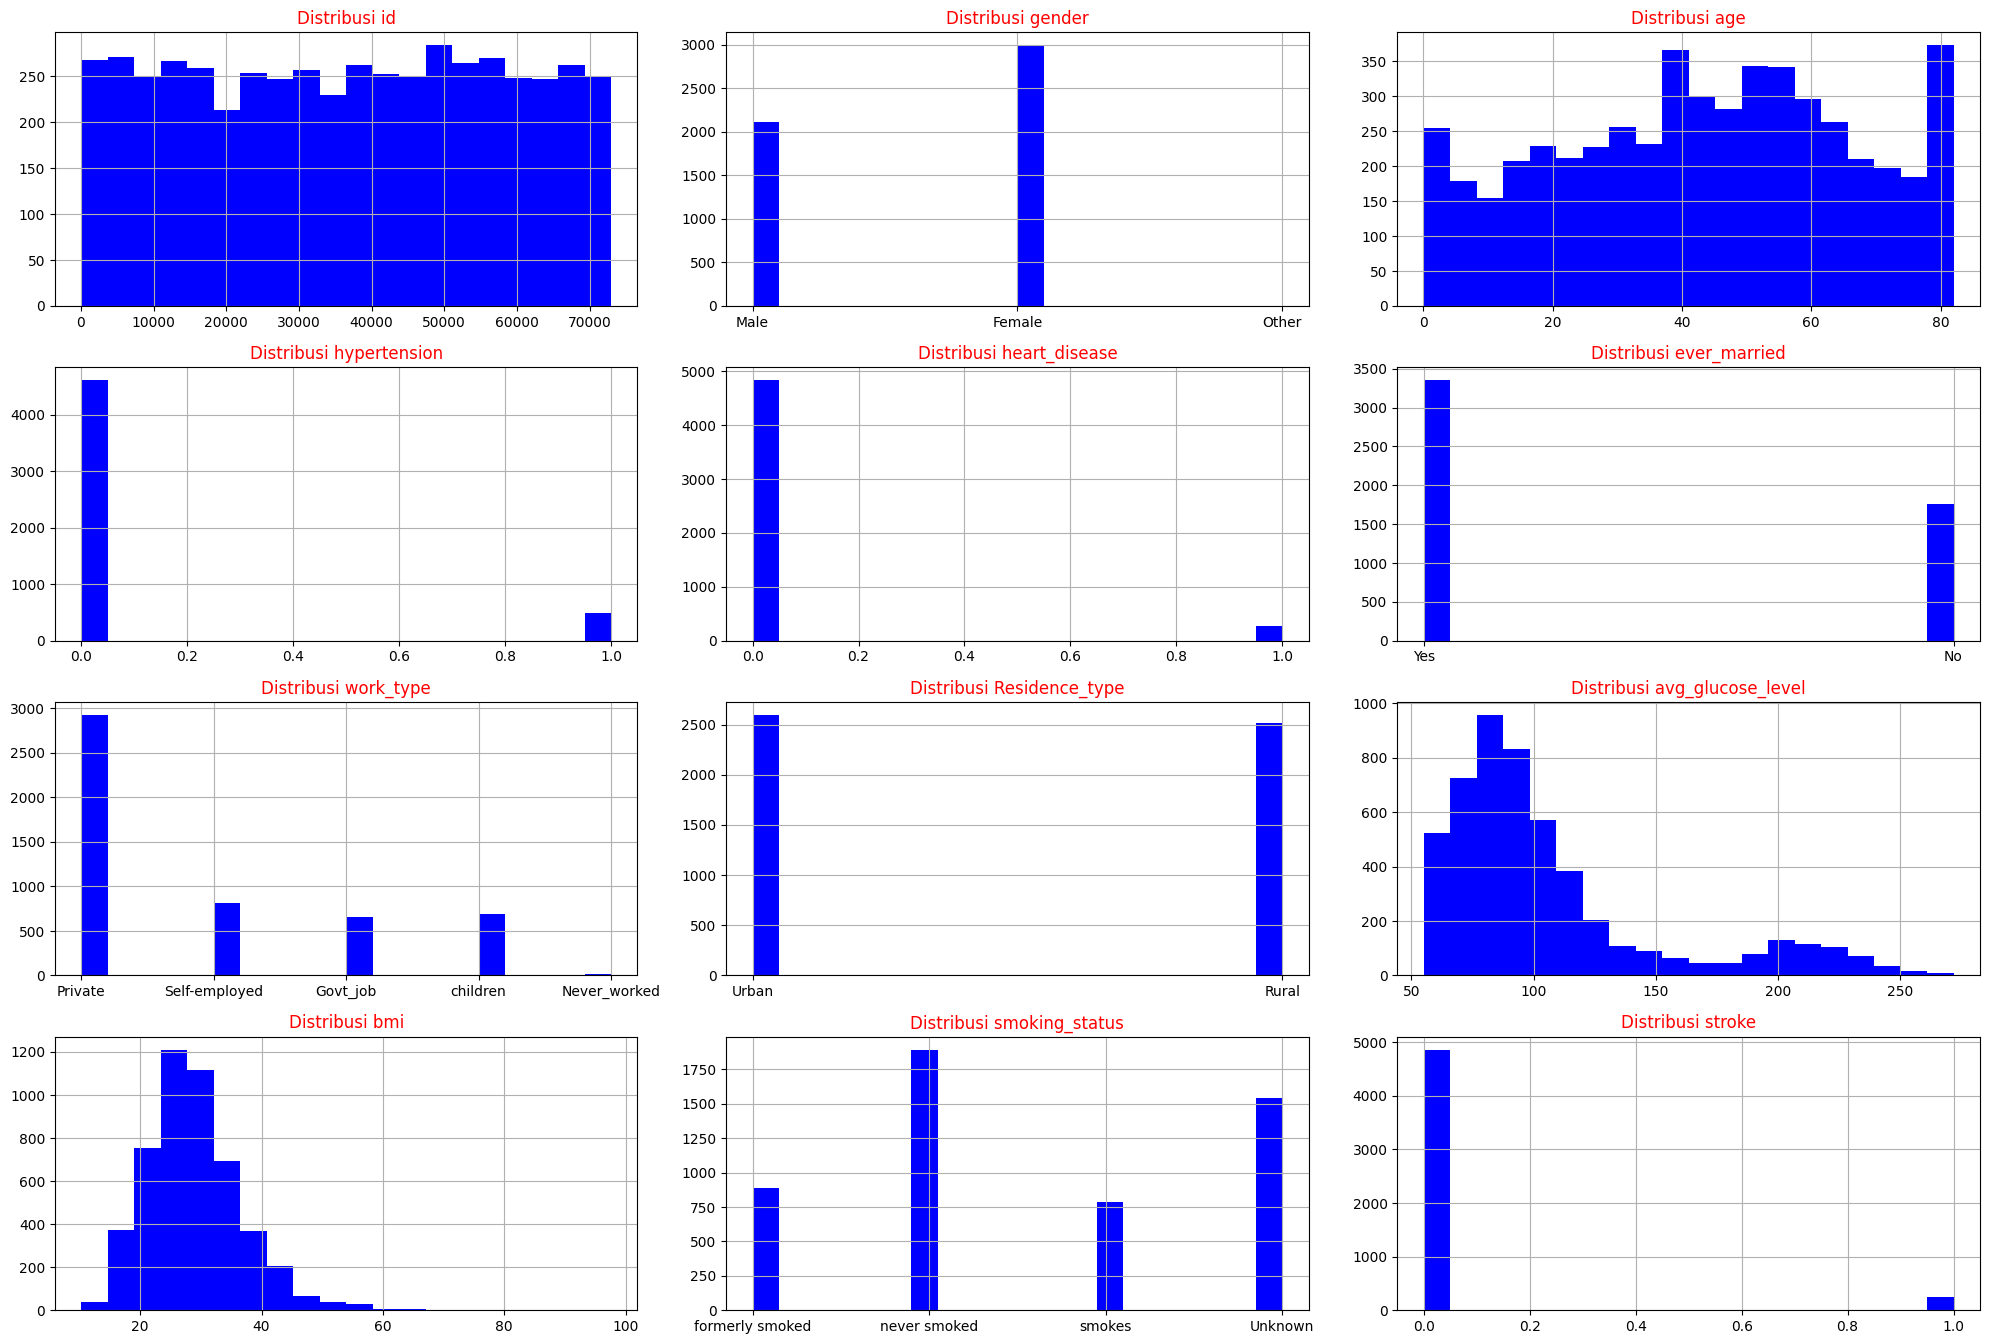

In [ ]:
#visualisasi distribusi
def hist(data, fitur, row, column):
    fig = plt.figure(figsize=(20,20))
    for i, fitur in enumerate(fitur):
        ax = fig.add_subplot(row, column, i+1)
        data[fitur].hist(bins=20, ax=ax, facecolor='blue')
        ax.set_title("Distribusi " + fitur, color='red')

    fig.tight_layout()
    plt.style.use('default')
    plt.show()

hist(stroke, stroke.columns, 6, 3)

dari visualisasi diatas, kita dapat mengetahui perbandingan dan distribusi dari data yang ada. seperti contohnya untuk distribusi stroke ternyata dari variabel yang ada, hanya sedikit yang menderita stroke. untuk yang tidak menderita stroke totalnya hampir menyentuh 5000.

## Data Preparation

### Select Data

In [ ]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Clean Data

In [ ]:
# Remove unnecessary Column (Menghapus kolom 'id')
stroke = stroke.drop(columns=['id'])

In [ ]:
# Variable dataset untuk algoritma c4.5 {lutfi}
strokeC45 = stroke.copy()

In [ ]:
# Handling Different Datatypes
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk kolom 'gender', 'ever_married', 'work_type', 'Residence_type', dan 'smoking_status'
le = LabelEncoder()
stroke['gender'] = le.fit_transform(stroke['gender'])
stroke['ever_married'] = le.fit_transform(stroke['ever_married'])
stroke['work_type'] = le.fit_transform(stroke['work_type'])
stroke['Residence_type'] = le.fit_transform(stroke['Residence_type'])
stroke['smoking_status'] = le.fit_transform(stroke['smoking_status'])

In [ ]:
# Handling Null/Missing Value (Mengisi missing value pada kolom 'bmi' dengan mean)
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace=True)

In [ ]:
# Handling Duplicate
print(stroke.duplicated().sum())

0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi pada kolom 'age', 'avg_glucose_level', dan 'bmi'
scaler = MinMaxScaler()
stroke[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke[['age', 'avg_glucose_level', 'bmi']])

In [ ]:
# Dataset Baru Hasil Cleaning Untuk Google Data Studio
stroke.to_csv("new_stroke.csv", index=False)

In [ ]:
# Splitting data menjadi train dan test
from sklearn.model_selection import train_test_split

X = stroke.drop('stroke', axis=1) 
y = stroke['stroke'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())

      gender       age  hypertension  heart_disease  ever_married  work_type  \
802        1  0.963379             0              0             1          3   
3927       0  0.755859             0              0             1          2   
2337       0  0.255371             0              0             0          2   
3910       1  0.377441             0              0             1          0   
1886       0  0.377441             0              0             0          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
802                0           0.265534  0.208477               1  
3927               1           0.153264  0.297824               0  
2337               0           0.020312  0.268041               2  
3910               1           0.048841  0.230241               1  
1886               0           0.020820  0.109966               2  


In [ ]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,2,1,0.132167,0.212981,2,0
5106,0,0.987793,0,0,1,3,1,0.323516,0.340206,2,0
5107,0,0.426270,0,0,1,3,0,0.128658,0.232532,2,0
5108,1,0.621582,0,0,1,2,0,0.513203,0.175258,1,0


### Clean Data, Preprocessing - c4.5

In [ ]:
strokeC45.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Handling missing value, remove unnecessary columns

In [ ]:
#memakai gender selain 'Other'
strokeC45 = strokeC45[stroke.gender !="Other"]

In [ ]:
#mengganti value 'Unknown' pada atribut 'smoking_status' menjadi NaN
strokeC45['smoking_status'] = strokeC45['smoking_status'].replace("Unknown",np.nan)

In [ ]:
#mengganti nilai nan atribut 'smoking_status' berdasarkan modus
strokeC45['smoking_status'] = strokeC45['smoking_status'].fillna(strokeC45['smoking_status'].mode()[0])

#mengganti nilai nan atribut 'bmi' berdasarkan mean
strokeC45['bmi'] = strokeC45['bmi'].fillna(strokeC45['bmi'].mean())

#### Handling Outlier

In [ ]:
def outlier(col):
    Q1 = strokeC45[col].quantile(0.25) # Mengetahui mana yang quartile 1
    Q3 = strokeC45[col].quantile(0.75) # Mengetahui mana yang quartile 3
    IQR = Q3 - Q1 # Simpangan Quartile (q3-q1)    
    return strokeC45[(strokeC45[col]> Q3 +1.5*IQR)  | (strokeC45[col]< Q1-1.5*IQR )]

In [ ]:
outlier("avg_glucose_level").value_counts().sum()/len(strokeC45)*100


12.270058708414872

In [ ]:
outlier("bmi").value_counts().sum()/len(strokeC45)*100


2.4657534246575343

In [ ]:
strokeC45 = strokeC45.drop(outlier("bmi").index)


#### Train / Test

In [ ]:
TARGET = strokeC45["stroke"]
data  =  strokeC45.drop(columns=["stroke"])

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data, TARGET, test_size=0.3, random_state=42)

In [ ]:
print(trainX.head())

      gender   age  hypertension  heart_disease ever_married      work_type  \
827   Female  31.0             0              0          Yes       Govt_job   
1324  Female  80.0             0              0          Yes       Govt_job   
2224    Male  57.0             0              0          Yes        Private   
4688    Male  31.0             0              0           No  Self-employed   
4717  Female  19.0             0              0           No        Private   

     Residence_type  avg_glucose_level        bmi   smoking_status  
827           Rural             104.55  26.400000     never smoked  
1324          Urban              84.86  28.893237     never smoked  
2224          Rural              76.28  31.400000  formerly smoked  
4688          Rural              64.85  23.000000     never smoked  
4717          Rural              66.70  24.700000     never smoked  


#### Lanjutan Visualization

###### Reletionship

<Axes: xlabel='gender', ylabel='smoking_status'>

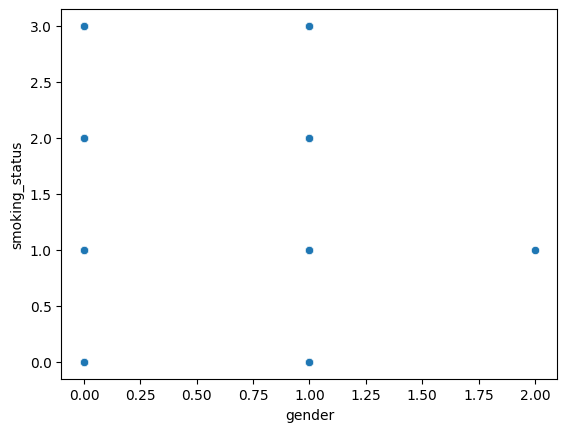

In [ ]:
# Scatterplot untuk gender dan smoking_status
sns.scatterplot(data=stroke,x="gender",y="smoking_status")

###### Korelasi

In [ ]:
# Membuat korelasi/hubungan antara data yang bertipe numerik
df_corr=stroke.corr()
df_corr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


<Axes: >

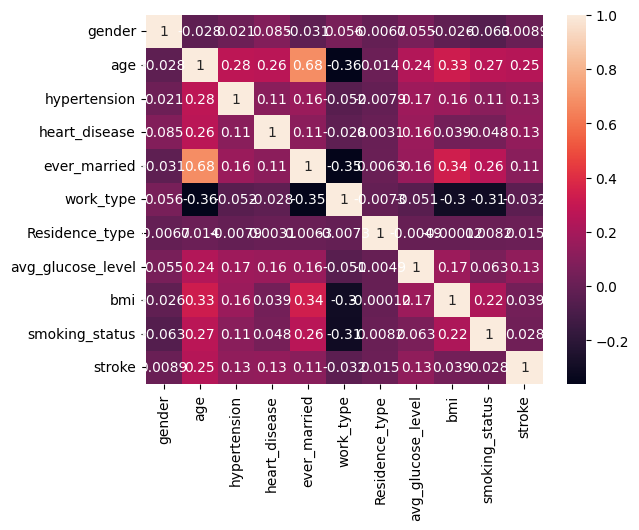

In [ ]:
# Membuat visualisasi dengan heatmap
sns.heatmap(df_corr,annot=True)

## Modeling

### Naive Bayes

In [ ]:
def calculate_probability(x, mean, stdev):
    if stdev == 0:
        stdev = 1e-6 # Menambahkan nilai kecil pada stdev yang bernilai 0
    exponent = -((x-mean)**2 / (2 * stdev**2 ))
    coefficient = -np.log(np.sqrt(2 * np.pi) * stdev)
    return exponent + coefficient

def calculate_feature_probabilities(x, features):
    probabilities = {}
    for feature in features:
        if stroke[feature].dtype == 'object':
            probabilities[feature] = 0
        else:
            mean = np.mean(stroke[feature])
            stdev = np.std(stroke[feature])
            x_value = x[feature]
            if stdev == 0:
                stdev = 1e-6 # Menambahkan nilai kecil pada stdev yang bernilai 0
            probabilities[feature] = calculate_probability(x_value, mean, stdev)
    
    # Normalisasi log probabilitas untuk setiap fitur
    max_log_prob = max(list(probabilities.values()))
    for feature in features:
        probabilities[feature] -= max_log_prob
    total_prob = np.exp(sum(probabilities.values()))
    for feature in features:
        probabilities[feature] = np.exp(probabilities[feature]) / total_prob
    
    return probabilities

# Membuat fungsi
def naive_bayes_classification(x, features):
    probabilities = calculate_feature_probabilities(x, features)
    stroke_prob = len(stroke[stroke['stroke'] == 1]) / len(stroke)
    no_stroke_prob = len(stroke[stroke['stroke'] == 0]) / len(stroke)
    stroke_probabilities = {}
    stroke_probabilities[1] = stroke_prob * np.prod(list(probabilities.values())[1:])
    stroke_probabilities[0] = no_stroke_prob * np.prod(list(probabilities.values())[1:])
    total_prob = stroke_probabilities[1] + stroke_probabilities[0]
    stroke_probabilities[1] /= total_prob
    stroke_probabilities[0] /= total_prob
    return stroke_probabilities

x = {'gender': 0, 'age': 0.1, 'hypertension': 0, 'heart_disease': 0, 'ever_married': 1, 'work_type': 2, 'Residence_type': 0, 'avg_glucose_level': 0.3, 'bmi': 0.25, 'smoking_status': 1}
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
result = naive_bayes_classification(x, features)

# Menampilkan hasil prediksi
if result[1] > result[0]:
    print('Prediksi: Stroke')
else:
    print('Prediksi: Non Stroke')

print(result)


Prediksi: Non Stroke
{1: 0.0487279843444227, 0: 0.9512720156555774}


### KNN

In [ ]:
#Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
#Memastikan bahwa seluruh variabel dari data yang akan diprediksi telah bertipe data numeric
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 4688 to 2902
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1022 non-null   int64  
 1   age                1022 non-null   float64
 2   hypertension       1022 non-null   int64  
 3   heart_disease      1022 non-null   int64  
 4   ever_married       1022 non-null   int64  
 5   work_type          1022 non-null   int64  
 6   Residence_type     1022 non-null   int64  
 7   avg_glucose_level  1022 non-null   float64
 8   bmi                1022 non-null   float64
 9   smoking_status     1022 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 87.8 KB


In [ ]:
#Melakukan pengecekkan berapakah jumlah nilai k yang paling optimal untuk digunakan
acc = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  acc.append(np.mean(pred_i != y_test))
  
print("acc:",min(acc),"dengan k =",acc.index(min(acc)))

acc: 0.05968688845401174 dengan k = 10


In [ ]:
#Pemodelan knn 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Melakukan prediksi data test
pred = knn.predict(X_test)
print("Hasil prediksi stroke : "+ ' '.join(map(str, pred)))
print("Keterangan : 0 = tidak stroke & 1 = stroke")

Hasil prediksi stroke : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Membuat tabel sample untuk data baru dari data test = X_test untuk diprediksi
sample = X_test.sample()

In [ ]:
sample

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3649,0,0.914551,0,0,1,3,1,0.193103,0.356243,2


In [ ]:
s_pred = knn.predict (sample)
print("Hasil prediksi stroke : "+ ' '.join(map(str, s_pred)))
print("Keterangan : 0 = tidak stroke & 1 = stroke")

Hasil prediksi stroke : 0
Keterangan : 0 = tidak stroke & 1 = stroke


**Berdasarkan proses prediksi dengan menggunakan model KNN dapat disimpulkan bahwa hasil prediksinya adalah 0 atau pasien tidak stroke.**

### C4.5

In [ ]:
class AlgoC45:
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=None):
        self.tree = None
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.classes_ = None

    def _hitung_entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / np.sum(counts)
        return -np.sum(probabilities * np.log2(probabilities))

    def _hitung_gain_ratio(self, X, y, feature):
        feature_values, value_counts = np.unique(X[:, feature], return_counts=True)
        feature_entropy = 0
        intrinsic_info = 0
        for value, count in zip(feature_values, value_counts):
            subset_y = y[X[:, feature] == value]
            subset_entropy = self._hitung_entropy(subset_y)
            probability = count / np.sum(value_counts)
            feature_entropy += probability * subset_entropy
            intrinsic_info -= probability * np.log2(probability)
        gain = self._hitung_entropy(y) - feature_entropy
        split_info = intrinsic_info
        if split_info != 0:
            gain_ratio = gain / split_info
        else:
            gain_ratio = 0
        return gain_ratio

    def _cari_best_split(self, X, y):
        best_feature = None
        best_gain_ratio = 0
        for feature in range(X.shape[1]):
            gain_ratio = self._hitung_gain_ratio(X, y, feature)
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_feature = feature
        return best_feature

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1:
            return {'leaf': y[0]}
        elif X.shape[1] == 0 or depth == self.max_depth:
            _, counts = np.unique(y, return_counts=True)
            return {'leaf': np.argmax(counts)}
        else:
            best_feature = self._cari_best_split(X, y)
            if best_feature is None:
                _, counts = np.unique(y, return_counts=True)
                return {'leaf': np.argmax(counts)}
            else:
                feature_values = np.unique(X[:, best_feature])
                node = {'node': best_feature}
                for value in feature_values:
                    subset_X = X[X[:, best_feature] == value]
                    subset_y = y[X[:, best_feature] == value]
                    if subset_X.shape[0] == 0:
                        _, counts = np.unique(y, return_counts=True)
                        node[value] = {'leaf': np.argmax(counts)}
                    else:
                        node[value] = self._build_tree(subset_X, subset_y, depth+1)
                return node

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        self.classes_ = np.unique(y)
        self.tree = self._build_tree(X, y, 0)

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if self.classes_ is None:
            raise ValueError("The model has not been trained yet.")
        predictions = np.empty(X.shape[0], dtype=self.classes_.dtype)
        for i in range(X.shape[0]):
            node = self.tree
            while 'leaf' not in node:
                feature = node['node']
                value = X[i, feature]
                if value in node:
                    node = node[value]
                else:
                    counts = np.zeros(len(self.classes_), dtype=int)
                    for j, c in enumerate(self.classes_):
                        if f'{c}' in node:
                            counts[j] = node[f'{c}']
                    predictions[i] = self.classes_[np.argmax(counts)]
                    break
            else:
                predictions[i] = node['leaf']
        return predictions


In [ ]:
c45 = AlgoC45()

In [ ]:
c45.fit(trainX,trainY)

## Evaluation

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Modeling dengan algoritma Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8669275929549902


### KNN

In [ ]:
#Evaluasi Model Dengan Menampilkan Metrik Informasi Detail
cek = classification_report(y_test, pred)
print(cek)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Evaluasi Model Dengan Metrik Seberapa Akurat Model
acc = accuracy_score(y_test, pred)
print('Accuracy:', acc)

Accuracy: 0.9393346379647749


**Berdasarkan hasil evaluasi antara model Naive Bayes dan KNN maka dapat disimpulkan bahwa model KNN paling akurat dengan nilai akurasi 0.939.. sedangkan Naive Bayes dengan nilai akurasi 0.866.**

### C4.5

In [ ]:
from sklearn.metrics import confusion_matrix

predict_y = c45.predict(testX)


tn, fp, fn, tp = confusion_matrix(testY, predict_y).ravel()
precision = tp / (tp + fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
pr = tp/(tp+fp)
rc =tp/(tp+fn)
f1 = (2*pr*rc)/pr+rc
specificity = (tn)/(tn+fp)


print(
f"""
precision = {precision}
accuracy = {accuracy}
recall = {recall}
f1 = {f1}
specificity = {specificity}

""")



precision = 0.09090909090909091
accuracy = 0.9371657754010695
recall = 0.011764705882352941
f1 = 0.03529411764705882
specificity = 0.9929128277817151




# Unsupervised

**Unsupervised** adalah proses pengolahan data dengan model algoritma jenis pengelompokkan seperti clustering. Proses pengelompokkan sendiri dimulai dari memproses dataset yang tidak memiliki kelas kemudian dikelompokkan berdasarkan kesamaan fitur/karakteristik.

## Business Understanding

### - Business Objective

**Tujuan pemakaian data mining** ialah berdasarkan jenis data yaitu unsupervised sehingga penerapan materi data mining pada kasus untuk mendapatkan hasil pengelompokkan dari data kumpulan film yang memiliki kemiripan dengan memperhatikan atribut tertentu seperti pemeran, tanggal rilis, negara, dan perusahaan produksi. Atribut - atribut tersebut digunakan sebagai patokan dalam menemukan kemiripan film agar dapat dikelompokkan. Hasil pengelompokkan tersebut dapat digunakan untuk memperjelas struktur atau pola dari data dan mempermudah untuk melihat adanya hubungan antar atribut.

**Tujuan dari penggunaan dataset** berdasarkan data yang didapatkan dari studi kasus kumpulan data film yang terdaftar pada MovieLens untuk mengelompokkan data film ke dalam kelompok data yang memilii kemiripan berdasarkan variabel yang dimiliki seperti genre, tanggal rilis, negara, dan lainnya dengan tujuan agar data yang akan digunakan tersebut tersimpan secara lebih terstruktur, mudah untuk ditemukan berdasarkan variabelnya, mudah untuk dikelola menjadi informasi dengan penerapan materi data mining, dan dapat mengetahui hubungan antar variabel yang ada pada data.

### - Asses Situasion

**Situasi dari studi kasus:**

Berdasarkan studi kasus data yang berisikan kumpula data film dari MovieLens yang bersifat unsupervise yaitu bertujuan pengelompokkan data dari kemiripan varibal maka diperlukan analisis berupa :
* Mengidentifikasi Permasalahan

Untuk dapat menemukan kelompok film yang sama maka diperlukan untu melihat beberapa faktor:
1. Mampu mengelompokkan data film dengan menerapkan materi data mining algoritma k-means.
2. Melihat variabel masing-masing dari film apakah ada yang sama atau tidak.

* Membuat level Permasalahan

Berdasarkan hasil identifikasi dari penjelasan diatas didapatkan level permasalahan sebagai berikut :
1. Melihat variabel masing-masing dari film apakah ada yang sama atau tidak.
2. Mampu mengelompokkan data film dengan menerapkan materi data mining algoritma k-means.

* Mencari Solusi

Solusi yang diperlukan untuk dapat mengelompokkan data film sesuai dengan fitur/jenis/variabelnya ialah dengan melakukan proses pemisahan data ke dalam kelompok yang homogen atau yang memiliki kesamaan (clustering).

**Situasi dari projek:**
1. Memerlukan kerjasama dalam mengolah data ini.
2. Memerlukan storage yang sedikit lebih karena data berukuran 239 mb.

**Hasil dari projek:**
1. Mendapatkan hasil pengelompokkan film yang memiliki kesamaan.
2. Mengetahui variabel apa saja yang menjadi faktor kesamaan data film.
3. Mampu menerapkan materi data mining dengan baik.

### - Data Mining Goals

Tujuan dari penerapan data mining pada studi kasus ini ialah untuk melakukan pengelompokkan film dengan menggunakan data yang telah didapatkan dari sumber. Pengelompokkan yang dilakukan ialah memisahkan data yang memiliki kesamaan variabel seperti  genre,tanggal rilis, ataupun negara sehingga didapatkan pola yang sama pada data.

### - Project Plan
*   Projek ini direncanakan untuk mengelompokkan data film yang ada pada data dengan mempertimbangkan atributnya.
*   Projek ini dikerjakan selama kurang lebih satu bulan dengan menggunakan bantuan tools VSCode, Google Collab, Jupiter Notebook, dan Python.
*   Tim yang bekerja pada projek ini adalah:
1.  Dzakiroh Nawaal Nabilah (003)
2.  Ahmad Lutfi (009)
3.  Nur Avivah (010)
4.  Agus Tri Setyowati (011)
*   Projek ini dikerjakan secara bersama namun membagi tugas sesuai tahap-tahap yang dibutuhkan kemudian akan dievaluasi bersama jika pekerjaan masing-masing dari kami telah selesai.
*   Projek ini dikerjakan dengan menggunakan penerepan CRISP-DM  sebagai salah satu standar untuk menghasilkan data yang berkualitas.



## Data Understanding

### Collect Data

Dataset yang digunakan didapat dari kaggle, "The Movies Dataset" oleh ROUNAK BANIK. Data dikumpulkan dari TMDB dan GroupLens.

[The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?datasetId=3405&sortBy=voteCount&sort=votes&select=movies_metadata.csv) - 
[TMDB](https://www.themoviedb.org/) - 
[GroupLens](https://grouplens.org/)

In [ ]:
movies = pd.read_csv("movies_metadata.csv")

<ipython-input-237-472343648836>:1: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



### Describe Data

**Informasi Atribut**

---

**adult**: Indicates if the movie is X-Rated or Adult.<br>
**belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.<br>
**budget**: The budget of the movie in dollars.<br>
**genres**: A stringified list of dictionaries that list out all the genres associated with the movie.<br>
**homepage**: The Official Homepage of the move.<br>
**id**: The ID of the move.<br>
**imdb_id**: The IMDB ID of the movie.<br>
**original_language**: The language in which the movie was originally shot in.<br>
**original_title**: The original title of the movie.<br>
**overview**: A brief blurb of the movie.<br>
**popularity**: The Popularity Score assigned by TMDB.<br>
**poster_path**: The URL of the poster image.<br>
**production_companies**: A stringified list of production companies involved with the making of the movie.<br>
**production_countries**: A stringified list of countries where the movie was shot/produced in.<br>
**release_date**: Theatrical Release Date of the movie.<br>
**revenue**: The total revenue of the movie in dollars.<br>
**runtime**: The runtime of the movie in minutes.<br>
**spoken_languages**: A stringified list of spoken languages in the film.<br>
**status**: The status of the movie (Released, To Be Released, Announced, etc.)<br>
**tagline**: The tagline of the movie.<br>
**title**: The Official Title of the movie.<br>
**video**: Indicates if there is a video present of the movie with TMDB.<br>
**vote_average**: The average rating of the movie.<br>
**vote_count**: The number of votes by users, as counted by TMDB.<br>

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies.shape
# Memberitahu bahwa dataset ini memiliki 45466 row / baris dan terdapat 24 kolom

(45466, 24)

In [ ]:
movies.head()
# Menampilkan 5 row pertama dari dataset

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies.tail()
# Menampilkan 5 row terakhir dari dataset

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


#### Filtering & Slicing

In [ ]:
#Menampilkan movies yang satusnya 'Planned' atau direncanakan
mov_statusP = movies[['title','status']]

mov_statusP[mov_statusP['status'] == 'Planned']

,title,status
20108,3 Zimmer/Küche/Bad,Planned
20989,After School Midnighters,Planned
30399,Ascendant,Planned
30402,Bad Boys for Life,Planned
32167,Zeitoun,Planned
37725,Barista,Planned
38107,Despite the Falling Snow,Planned
40619,Maximum Ride,Planned
40715,The Night Stalker,Planned
41178,Ice Guardians,Planned


In [ ]:
# mefilter movie yang penghasilannya lebih dari 100 juta dolar
mov_highBudget = movies[['title','revenue']]
mov_highBudget[mov_highBudget['revenue'] > 100000000].head(5)


,title,revenue
0,Toy Story,373554033.0
1,Jumanji,262797249.0
5,Heat,187436818.0
9,GoldenEye,352194034.0
10,The American President,107879496.0


#### Sorting

In [ ]:
# Menampilkan yang penghasilannya tertinggi
highBudget_sorted = mov_highBudget.sort_values(by='revenue', ascending= False)
highBudget_sorted.head(10)

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09
28830,Furious 7,1.506249e+09
26558,Avengers: Age of Ultron,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
22110,Frozen,1.274219e+09
42222,Beauty and the Beast,1.262886e+09


In [ ]:
mov_highRun = movies[['title','runtime','revenue']]
mov_highRun = mov_highRun[mov_highRun['runtime'] < 300 ]
mov_highRun = mov_highRun[mov_highRun['runtime'] > 0 ]
highRun_sorted = mov_highRun.sort_values(by='revenue', ascending= [False])
highRun_sorted.head()

,title,runtime,revenue
14551,Avatar,162.0,2.787965e+09
26555,Star Wars: The Force Awakens,136.0,2.068224e+09
1639,Titanic,194.0,1.845034e+09
17818,The Avengers,143.0,1.519558e+09
25084,Jurassic World,124.0,1.513529e+09


In [ ]:
#melihat banyak bahasa yang digunakan dalam movies
lang_mov = pd.DataFrame(movies['original_language'].value_counts())
lang_mov['language'] = lang_mov.index
lang_mov.columns = ['number', 'language']
lang_mov.head(10)

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


In [ ]:
lang_stat = pd.DataFrame(movies['status'].value_counts())
lang_stat['stat'] = lang_stat.index
lang_stat.columns = ['number', 'status']
lang_stat.head(6)

,number,status
Released,45014,Released
Rumored,230,Rumored
Post Production,98,Post Production
In Production,20,In Production
Planned,15,Planned
Canceled,2,Canceled


### Data Visualization

#### Comparison

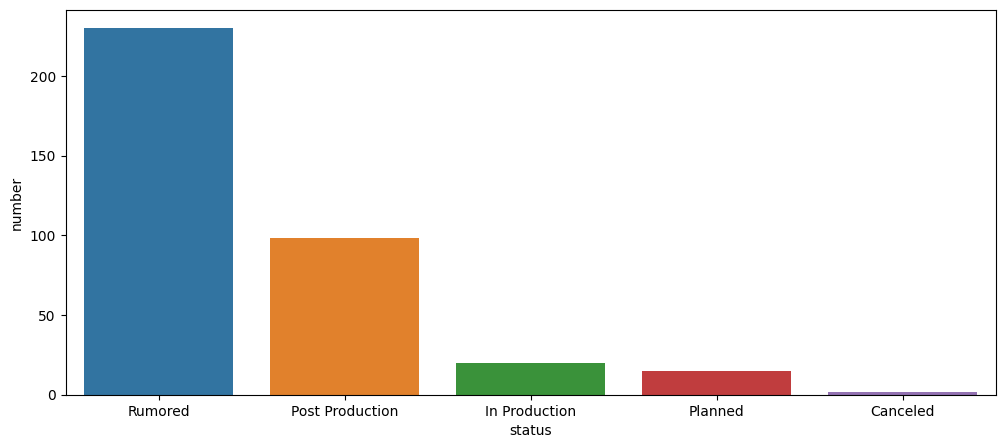

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='status', y='number', data=lang_stat.iloc[1:6])
plt.show()
# Ini adalah perbandingan dari 5 satus movies yang setelah status 'Released'


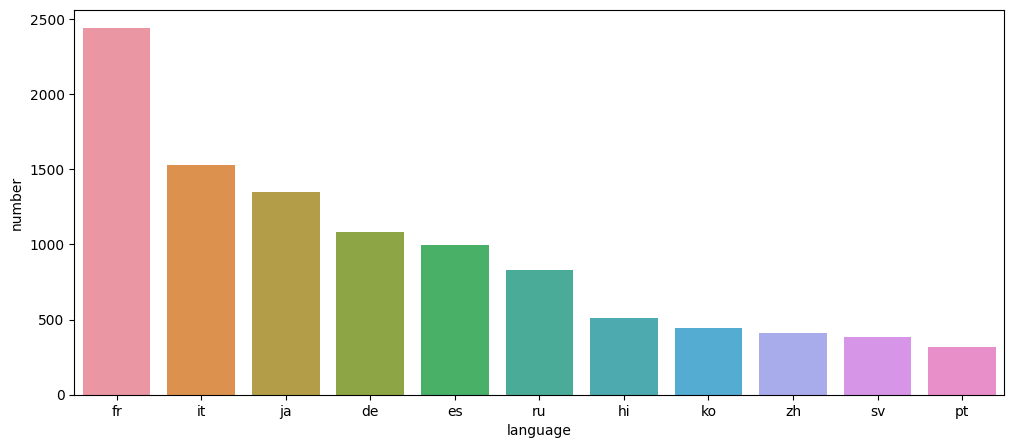

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_mov.iloc[1:12])
plt.show()
# Ini adalah perbandingan dari 11 bahasa yang paling umun digunakan setelah bahasa inggris
# 'original_language' dengan 'spoken_languages' itu berbeda, 'spoken_languages' merupakan bahasa apa saja yg diucapkan dalam movie

#### Distribution

<Axes: xlabel='runtime', ylabel='Density'>

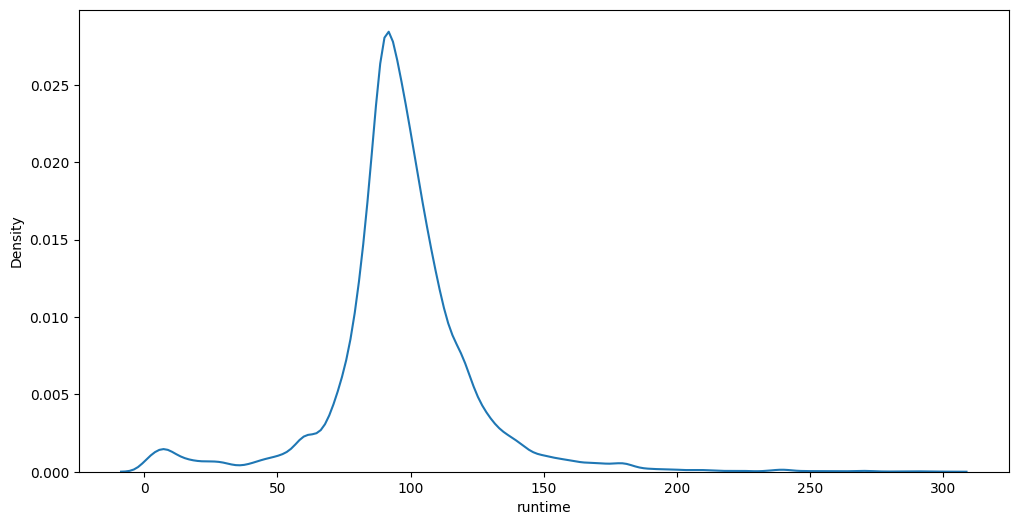

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(movies[(movies['runtime'] < 300) & (movies['runtime'] > 0)]['runtime'])

## Data Preparation

### Select Data

Pada [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?datasetId=3405&sortBy=voteCount&sort=votes&select=movies_metadata.csv) ada sebanyak 6 dataset, tetapi disini hanya menggunakan 1 yaitu 'movies_metadata.csv'. Alasanya karena 'movies_metadata.csv' merupakan dataset inti.

In [ ]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


### Clean Data

#### Type Handleing & null Value

Pada dataset ini terdapat atribut yang tipe datanya tidak sesuai, seperti 'budget' yang seharusnya tipe datanya int. Tipe data yang tidak sesuai ini perlu diperbaiki

In [ ]:
movies['budget'] = pd.to_numeric(movies['budget'],errors='coerce')
movies['budget'] = movies['budget'].replace(0, np.nan)

# mengubah tipe data kolom budget menjadi numerik, 
# errors='coerce' fungsinya buat mengubah nilai yang 
# tidak dapat dikonversi menjadi angka menjadi NaN

movies['revenue'] = movies['revenue'].replace(0, np.nan)

In [ ]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
movies['popularity'] = movies['popularity'].apply(clean_numeric).astype('float')
movies['vote_count'] = movies['vote_count'].apply(clean_numeric).astype('float')
movies['vote_average'] = movies['vote_average'].apply(clean_numeric).astype('float')

In [ ]:

movies['runtime'] = movies['runtime'].replace(0, np.nan)
movies['popularity'] = movies['popularity'].replace(0, np.nan)
movies['vote_count'] = movies['vote_count'].replace(0, np.nan)
movies['vote_average'] = movies['vote_average'].replace(0, np.nan)

#### Duplicate

In [ ]:
duplicateRows = movies[movies.duplicated(keep=False)]
duplicateRows.shape

(33, 24)

In [ ]:
movies = movies.drop_duplicates(keep='first')

#### Remove unnecessary Columns

In [ ]:
movies_notnum = movies[['budget','popularity','revenue','runtime','vote_average','vote_count', 'title']]

In [ ]:
movies_notnum['vote_count'].describe()

count    42546.000000
mean       117.406924
std        506.987239
min          1.000000
25%          4.000000
50%         11.000000
75%         38.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
movies_numeric = movies_notnum.drop('title', axis=1)

In [ ]:
movies_numeric.isna().sum()/len(movies_numeric)*100


budget          80.441814
popularity       0.158419
revenue         83.707012
runtime          4.006689
vote_average     6.605206
vote_count       6.387379
dtype: float64

kolom yg memiliki nilai null, lebih dari 70% akan dihapus

In [ ]:
movies_numeric = movies_numeric.drop(['budget'], axis=1)
movies_numeric = movies_numeric.drop(['revenue'], axis=1)

In [ ]:
movies_numeric.isna().sum()

popularity        72
runtime         1821
vote_average    3002
vote_count      2903
dtype: int64

In [ ]:
movies_numeric.popularity.fillna(movies_numeric.popularity.median(),inplace=True)
movies_numeric.runtime.fillna(movies_numeric.runtime.median(),inplace=True)
movies_numeric.vote_average.fillna(movies_numeric.vote_average.median(),inplace=True)
movies_numeric.vote_count.fillna(movies_numeric.vote_count.median(),inplace=True)

####Handling outlier

In [ ]:
def outlier(col):
    Q1 = movies_numeric[col].quantile(0.25) 
    Q3 = movies_numeric[col].quantile(0.75) 
    IQR = Q3 - Q1
    return movies_numeric[(movies_numeric[col]> Q3 +1.5*IQR)  | (movies_numeric[col]< Q1-1.5*IQR )]

In [ ]:
print(outlier("popularity").value_counts().sum()/len(movies_numeric)*100)
print(outlier("runtime").value_counts().sum()/len(movies_numeric)*100)
print(outlier("vote_average").value_counts().sum()/len(movies_numeric)*100)
print(outlier("vote_count").value_counts().sum()/len(movies_numeric)*100)

9.329138154854892
9.762591036106405
3.687649893286981
15.247860238949151


In [ ]:
movies_numeric = movies_numeric.drop(outlier("vote_average").index)


In [ ]:
# Dataset Baru Untuk Google Data Studio
movies_numeric.to_csv("new_movies.csv", index=False)

#### Lanjutan Visualization

###### Distribution

In [ ]:
movies['title'] = movies['title'].astype('str')
title_corpus = ' '.join(movies['title'])

<ipython-input-269-adc552ceda8e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



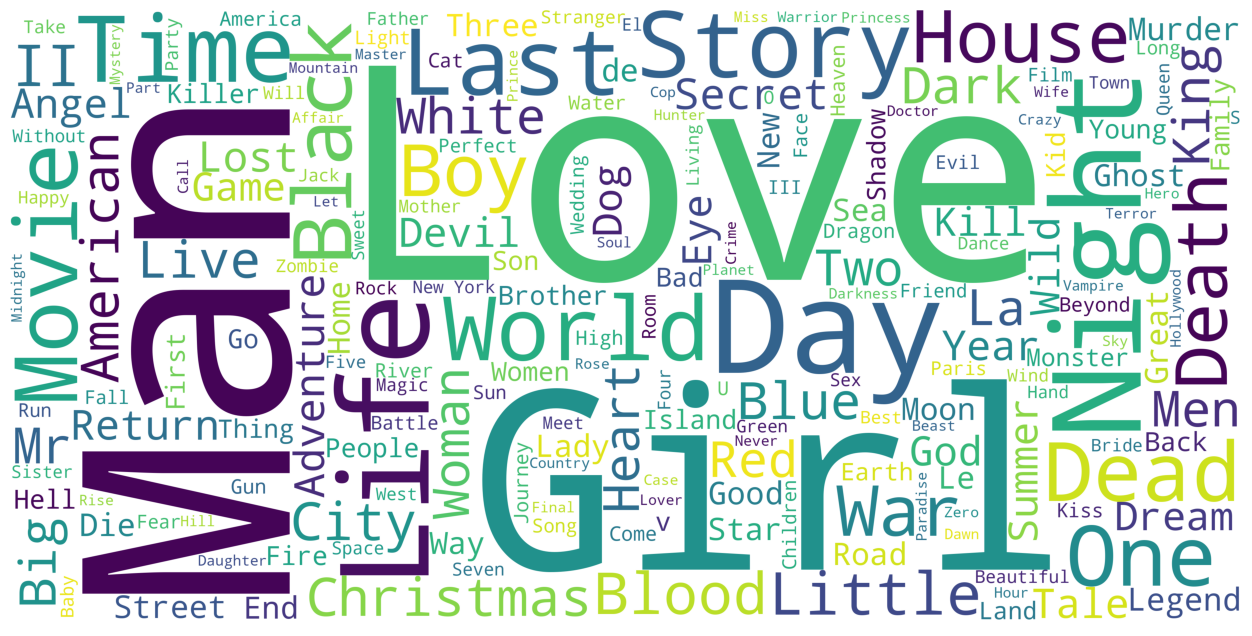

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Kata Love / cinta adalah kata yang sering digunakan dalam judul film. Girl, Day dan Man juga merupakan kata yang paling sering muncul. 

###### Relationship

<Axes: xlabel='vote_average', ylabel='popularity'>

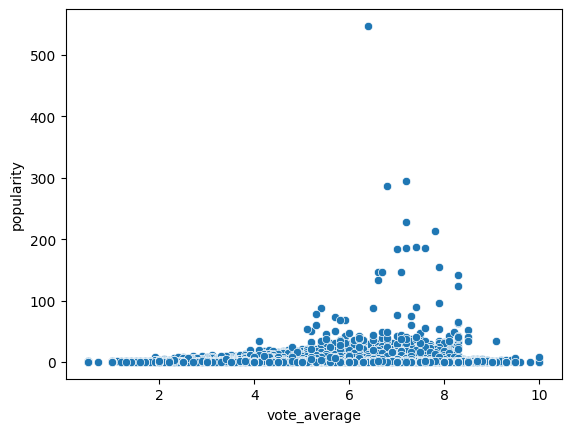

In [ ]:
sns.scatterplot(data= movies, x="vote_average", y="popularity")

<Axes: xlabel='vote_average', ylabel='vote_count'>

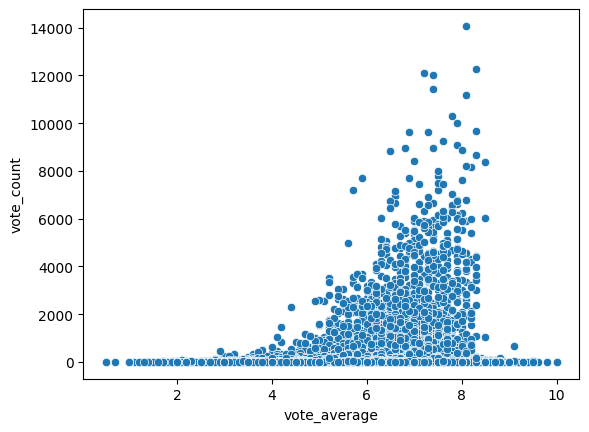

In [ ]:
sns.scatterplot(data= movies, x="vote_average", y="vote_count")

##### correlation

In [ ]:
px.imshow(movies_numeric.corr())

#### Feature Engineering

#### Dataset Description

# MODELING KMeans

In [ ]:
#mengambil 25% teratas data
movies_num2 = movies_numeric[movies_numeric['vote_count'] > 30]

data movies diambil 25% teratas karena agar terlihat persebarannya

In [ ]:
#menghapus row yang terdapat data kosong
movies_num2.isnull().sum()
movies_num2.dropna(inplace=True)

<ipython-input-275-46509b0399ec>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
movies_num2

,popularity,runtime,vote_average,vote_count
0,21.946943,81.0,7.7,5415.0
1,17.015539,104.0,6.9,2413.0
2,11.712900,101.0,6.5,92.0
3,3.859495,127.0,6.1,34.0
4,8.387519,106.0,5.7,173.0
...,...,...,...,...
45353,2.302582,92.0,5.9,33.0
45373,9.222308,83.0,6.0,38.0
45380,5.667067,83.0,6.2,37.0
45437,20.821780,4.0,8.3,146.0


In [ ]:
#mengskalakan data agar tidak ada yang dominan. di skala jadi 1-10
movies_angka = ((movies_num2 - movies_num2.min()) / (movies_num2.max() - movies_num2.min())) * 9 + 1

In [ ]:
movies_angka.describe()

,popularity,runtime,vote_average,vote_count
count,12141.000000,12141.000000,12141.000000,12141.000000
mean,1.129281,2.062681,5.863479,1.229530
std,0.160089,0.299427,1.498012,0.572190
min,1.000000,1.000000,1.000000,1.000000
25%,1.067819,1.924658,4.833333,1.012176
50%,1.108195,2.027397,6.000000,1.043577
75%,1.160824,2.160959,7.000000,1.172387
max,10.000000,10.000000,10.000000,10.000000


In [ ]:
movies_angka.head()

,popularity,runtime,vote_average,vote_count
0,1.360739,1.821918,8.166667,4.450299
1,1.279673,2.058219,6.833333,2.526488
2,1.192504,2.027397,6.166667,1.039091
3,1.063404,2.294521,5.500000,1.001923
4,1.137839,2.078767,4.833333,1.091000


In [ ]:
#menentukan centroid random. function apply bakal ngeiterate tiap data di kolom trus diubah ke floar. 
def random_centroid(data, k):
  centroids = []
  for i in range(k):
    centroid = movies_angka.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1) #diubah jadi dataframe


In [ ]:
#ngerandom centroid
centroids = random_centroid(movies_angka, 4)

In [ ]:
centroids

,0,1,2,3
popularity,1.046265,1.076328,1.077035,1.072260
runtime,2.849315,1.965753,2.263699,1.945205
vote_average,3.666667,6.166667,5.333333,6.500000
vote_count,1.022430,1.017303,1.002563,1.016662


centroid yang dihasilkan merupakan nilai yang didapatkan secara random untuk dijadikan acuan

In [ ]:
#labeling datanya
#jadi tiap data yang ada tuh dibandingkan jaraknya antar tiap centroid di klaster yang ada. trus diambil yang paling deket karaknya dengan centroid

def get_label(data, centroid):
  distances = centroids.apply(lambda x: np.sqrt(((movies_angka - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1) #buat nentuin index dari tiap data

In [ ]:
labels = get_label(movies_angka, centroids)

In [ ]:
#buat ngeliat klasternya
labels.value_counts()

3    4716
2    3655
1    1957
0    1813
dtype: int64

In [ ]:
def new_centroids(data, labels, k): 
    #nambil rata-rata dari tiap data. terus dikelompokkan berdasarkan label
    #T itu buat puterin dataframenya. yg row jadi kolom, kolom jadi row
    centroids = movies_angka.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

# visualisasi persebaran tiap data kmeans

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_klaster(dataset, klaster, centroids, iterasi):
    pca = PCA(n_components=2)
    mov_2d = pca.fit_transform(dataset)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'iterasi ke:  {iterasi}')
    plt.scatter(x=mov_2d[:,0], y=mov_2d[:, 1], c=klaster)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:, 1])
    plt.show()

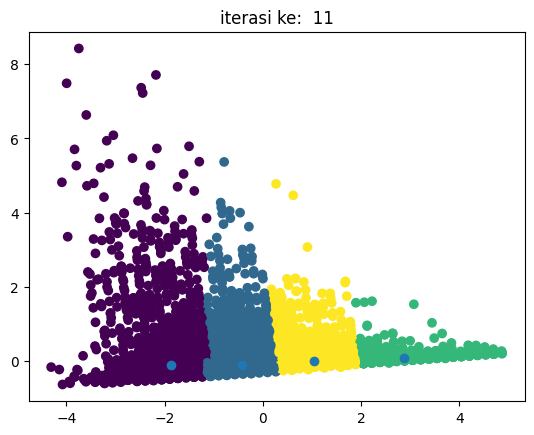

In [ ]:
max_iterations = 100
k = 4

centroids = random_centroid(movies_angka, k)
centroids_lama = pd.DataFrame()
iterasi = 1

while iterasi < max_iterations and not centroids.equals(centroids_lama):
    centroids_lama = centroids
    
    labels = get_label(movies_angka, centroids)
    centroids = new_centroids(movies_angka, labels, k)
    plot_klaster(movies_angka, labels, centroids, iterasi)
    iterasi += 1


In [ ]:
centroids

,0,1,2,3
popularity,1.141537,1.120856,1.104361,1.120858
runtime,2.108251,2.058349,1.951644,2.014030
vote_average,7.735446,6.291655,2.996706,4.838314
vote_count,1.288467,1.158150,1.056898,1.130150


kita bisa melihat perbedaan dari tiap klaster berdasarkan centroidnya

In [ ]:
len(labels)

12141

In [ ]:
len(movies_num2)

12141

In [ ]:
labels.value_counts()

1    4326
3    3742
0    2817
2    1256
dtype: int64

In [ ]:
movies_num2[labels == 3]

,popularity,runtime,vote_average,vote_count
3,3.859495,127.0,6.1,34.0
4,8.387519,106.0,5.7,173.0
7,2.561161,97.0,5.4,45.0
8,5.231580,106.0,5.5,174.0
11,5.430331,88.0,5.7,210.0
...,...,...,...,...
45268,5.613875,100.0,5.3,153.0
45339,7.250495,92.0,5.2,94.0
45353,2.302582,92.0,5.9,33.0
45373,9.222308,83.0,6.0,38.0


In [ ]:
#menambahkan labels kedalam kolom baru bernama klaster pada dataset movies_num2
movies_num2 = movies_num2.assign(klaster = labels)

In [ ]:
movies_num2[labels==0].head()

,popularity,runtime,vote_average,vote_count,klaster
0,21.946943,81.0,7.7,5415.0,0
5,17.924927,170.0,7.7,1886.0,0
12,12.140733,78.0,7.1,423.0,0
13,5.092000,192.0,7.1,72.0,0
15,10.137389,178.0,7.8,1343.0,0


# perbandingan dari tiap klaster

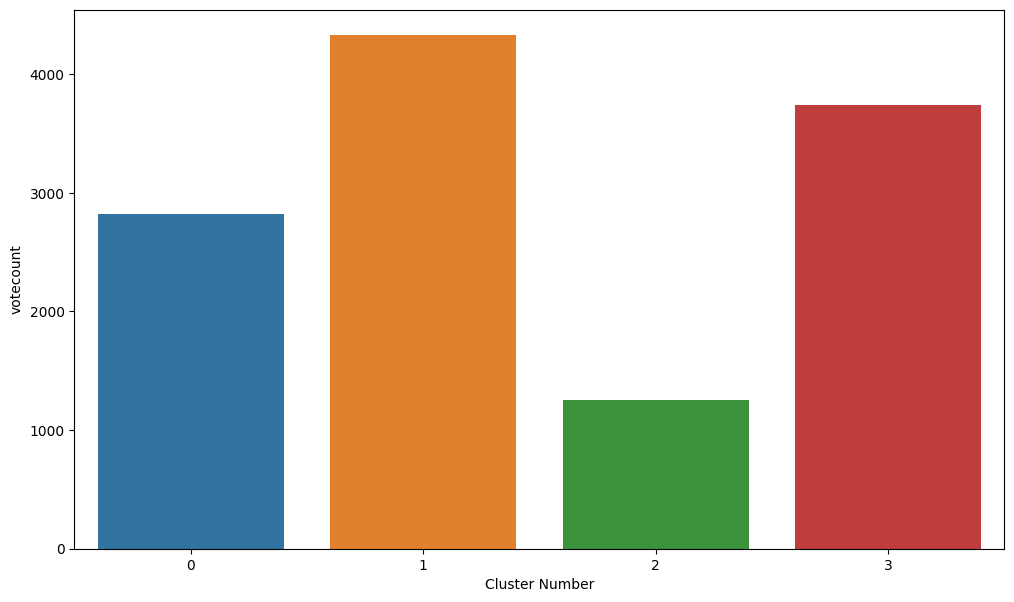

In [ ]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1),y=movies_num2.groupby(['klaster']).count()['vote_count'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("votecount")

# Evaluasi Kmeans

Silhouette score adalah metrik pengukuran untuk mengkalkulasikan kecocokan suatu algoritma. dapat juga dijadikan sebagai patokan untuk melihat seberapa optimal nilai K (penentu jumlah klaster)

nilai dari silhoutte score adalah -1 sampai 1.

nilai 0 menandakan klaster overlapping. antara kesalahan di dalam nilai dataset atau klaster.

Nilai 1 menandakan klaster ideal karena terpisah secara baik.

nilai negatif menandakan terdapat nilai yang salah masuk klaster

In [ ]:
#evaluasi
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(movies_angka, labels)

In [ ]:
silhouette_avg

0.5772233984812211

dari hasil perhitungan silhouette score, didapat hasil pada pemanggilan variabel silhoutte_avg. jika hasil mendekati nilai 0, maka data overlapping. Jika nilai mendekati 1, maka klaster sudah optimal. jika klaster bernilai negatif, maka terdapat kesalahan pada data atau proses algoritma

#Visualisai tiap Klaster

In [ ]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(dataset):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    for i,col in enumerate(kolom):
        sns.histplot(data=dataset,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=dataset,x=col,ax=ax[1][i])

In [ ]:
kolom = ['popularity', 'runtime', 'vote_average']

kolom vote_count tidak dimasukkan karena nilainya terlalu banyak

In [ ]:
klaster1 = movies_num2[labels == 0]
klaster2 = movies_num2[labels == 1]
klaster3 = movies_num2[labels == 2]
klaster4 = movies_num2[labels == 3]

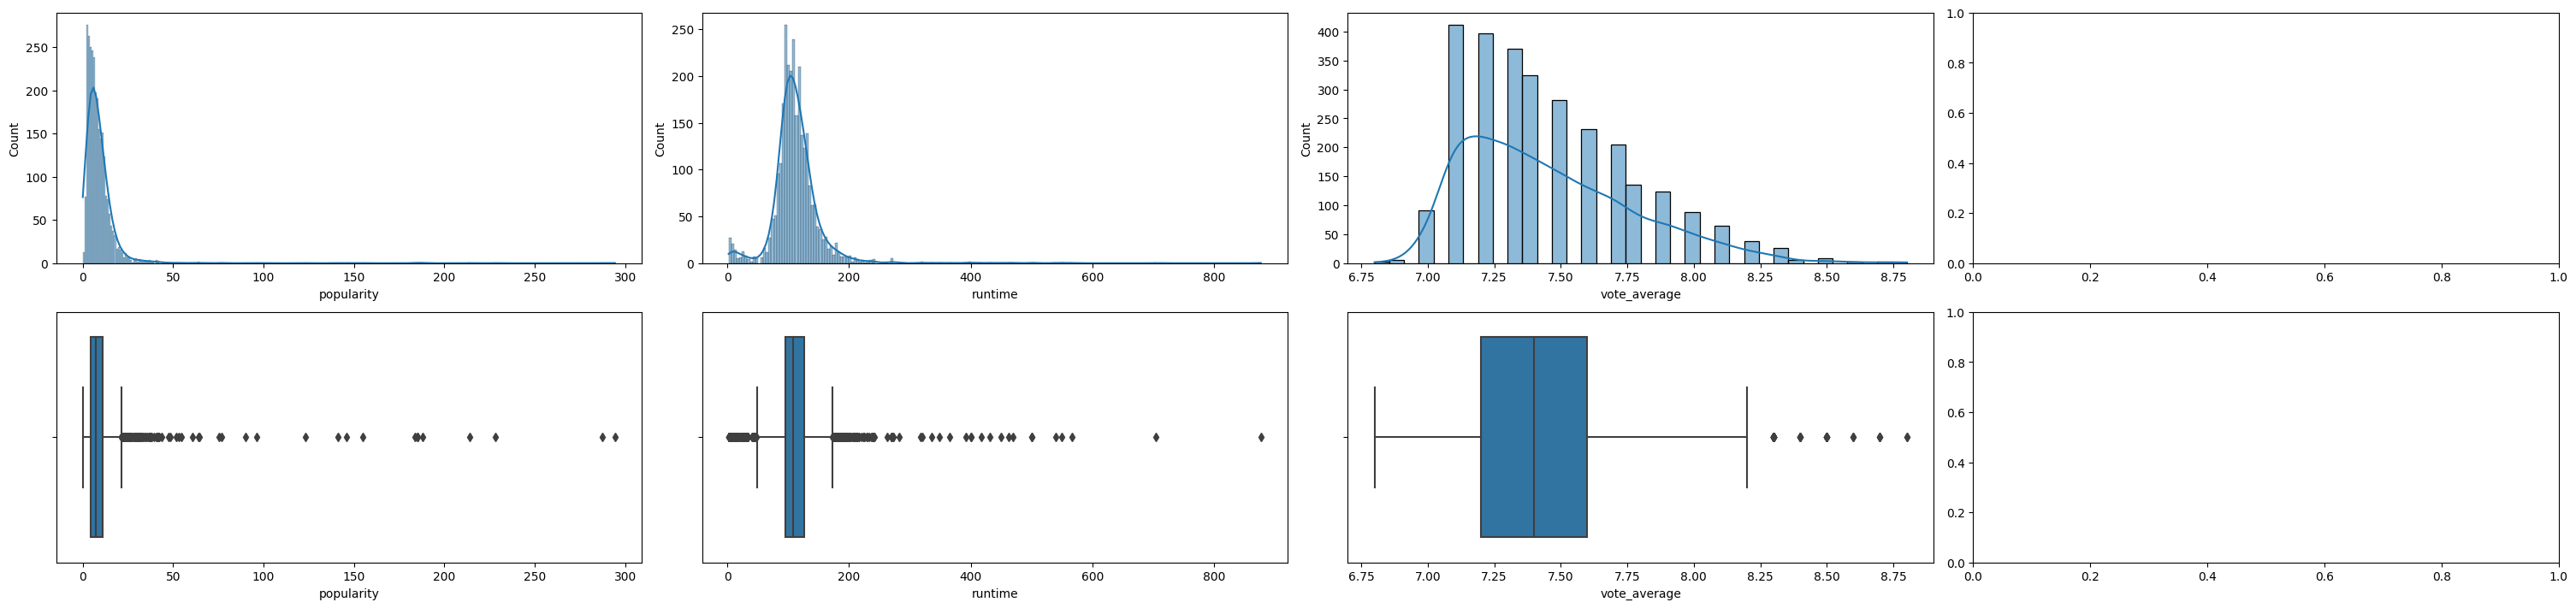

In [ ]:
plot_cluster(klaster1)

Ciri-ciri klaster 1:
- rata-rata film pada klaster ini memiliki rating antara 7.20 - 7.60 (dilihat dari q1 dan q3). menandakan film pada klaster ini termasuk bagus.
- runtime berkisar di sekitar 100 menit. (sekitar 1 jam lebih)


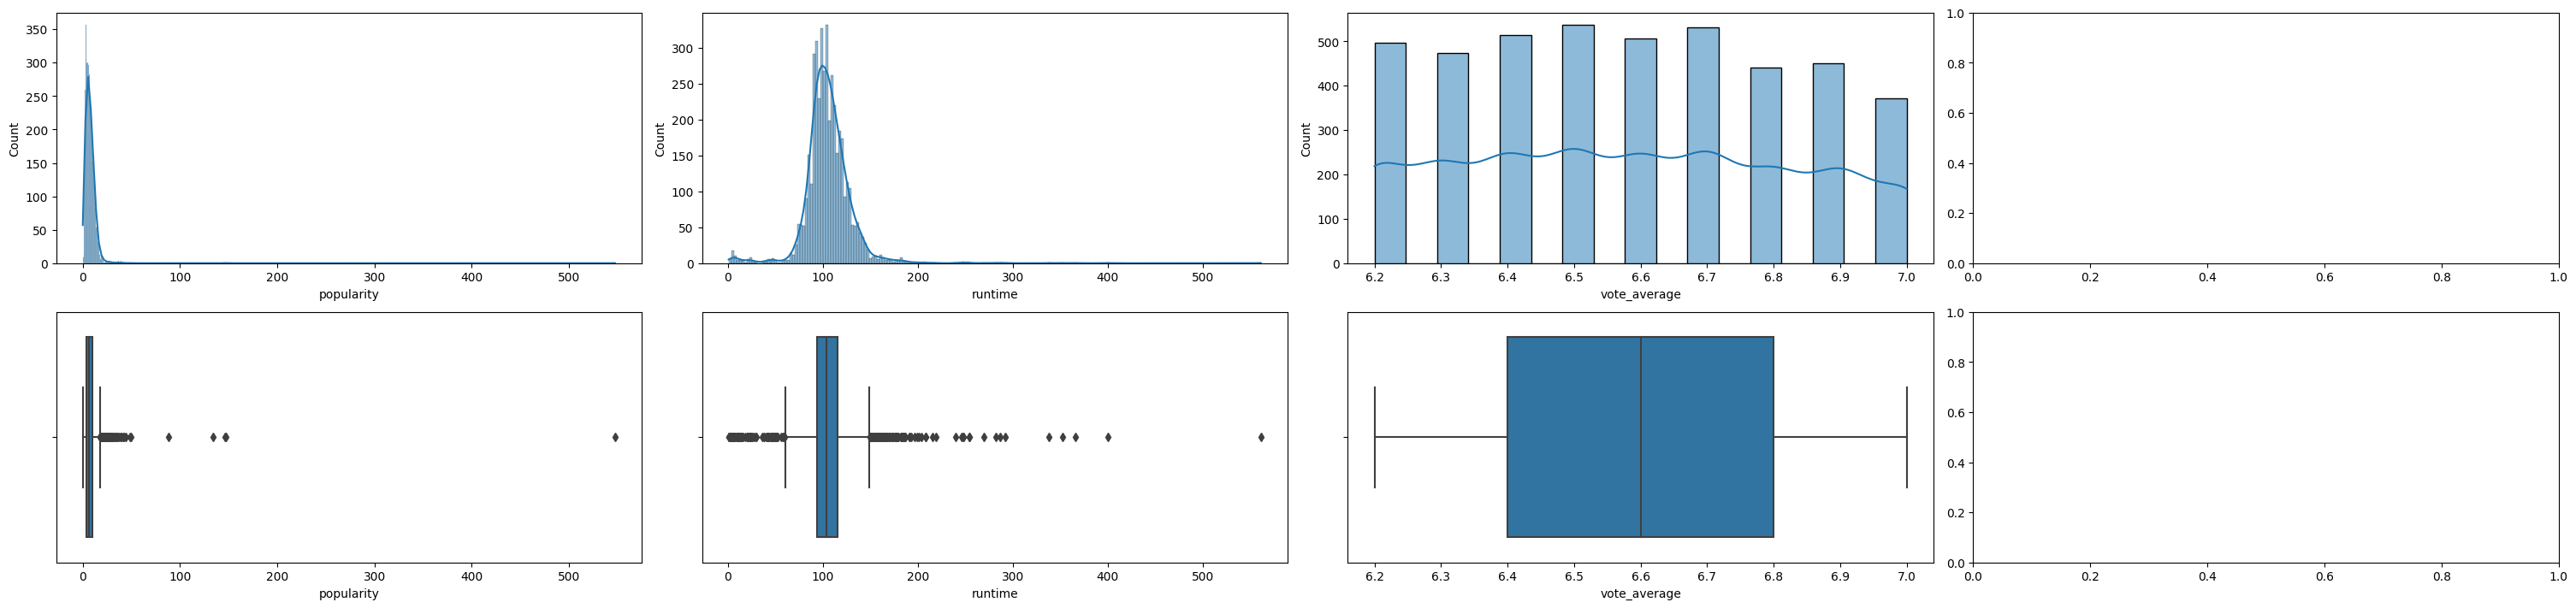

In [ ]:
plot_cluster(klaster2)

ciri-ciri klaster 2:
- rata-rata vote pada film di klaster ini adalah 6,4 - 6,8. (dilihat dari q1 dan q3). menandakan film di klaster ini tidak sebagus film di klaster 1, tetapi masih standar.
- runtime berada di kisaran 90-120 menit. standar untuk ukuran film.

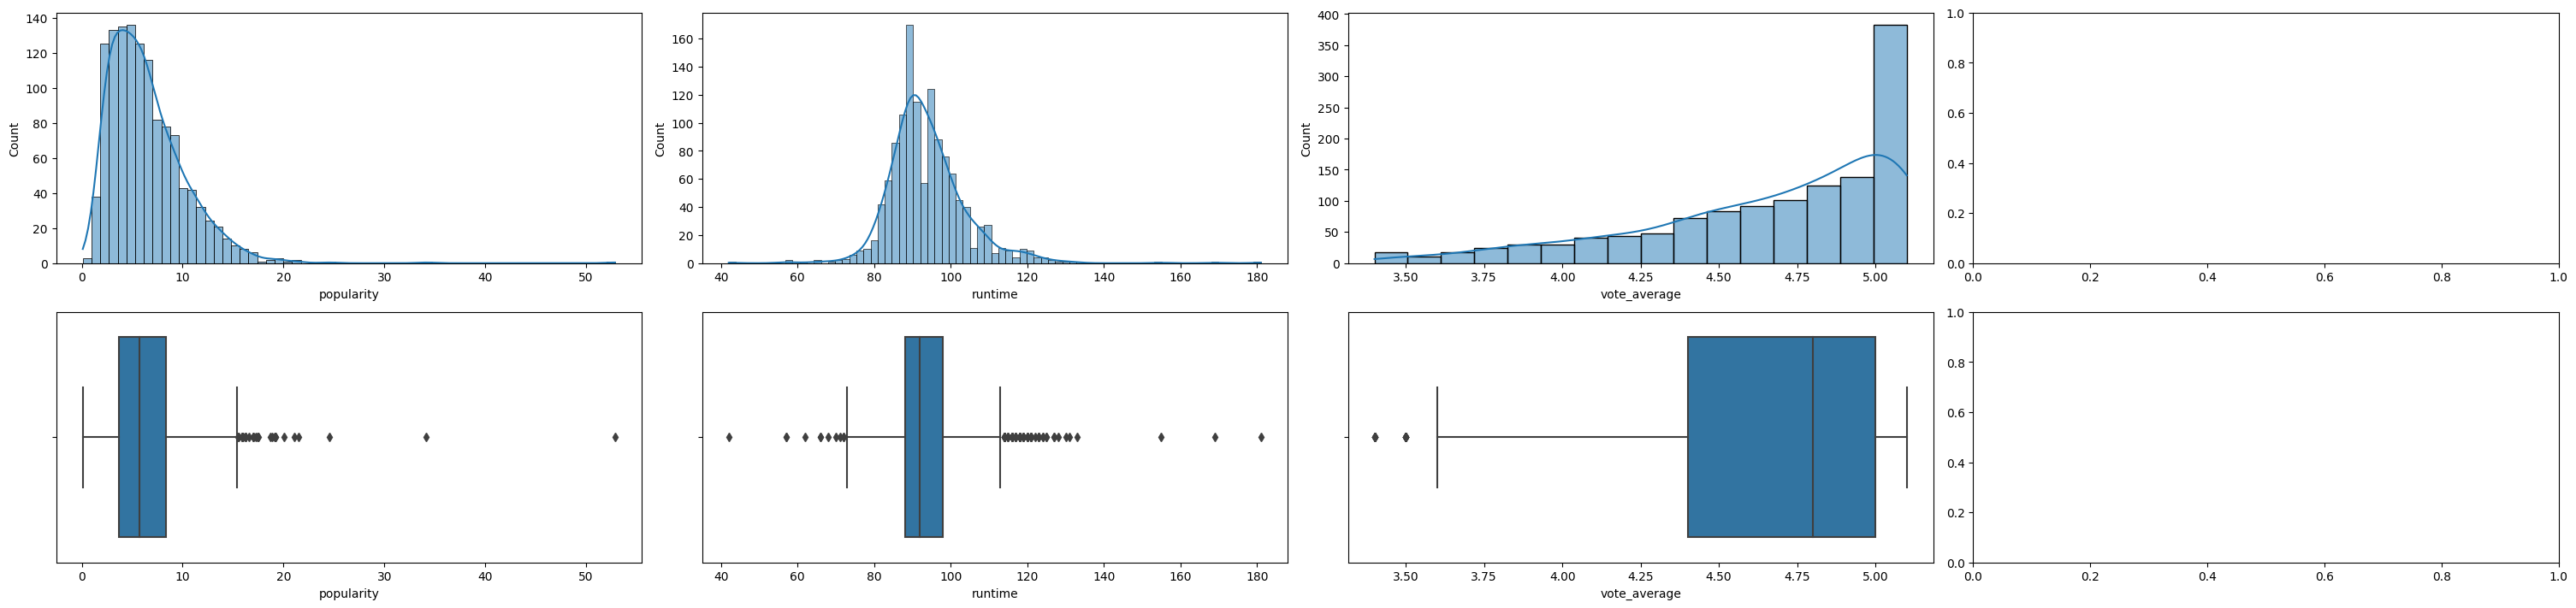

In [ ]:
plot_cluster(klaster3)

Ciri-ciri klaster 3:
- rata-rata vote untuk film ini adalah 4.35 - 5. dari seluruh klaster, klaster ini yang memiliki rata-rata rating terendah. menandakan film di klaster ini tidak begitu disenangi.
- runtime dari film ini berada di kisaran 85-100 menit.

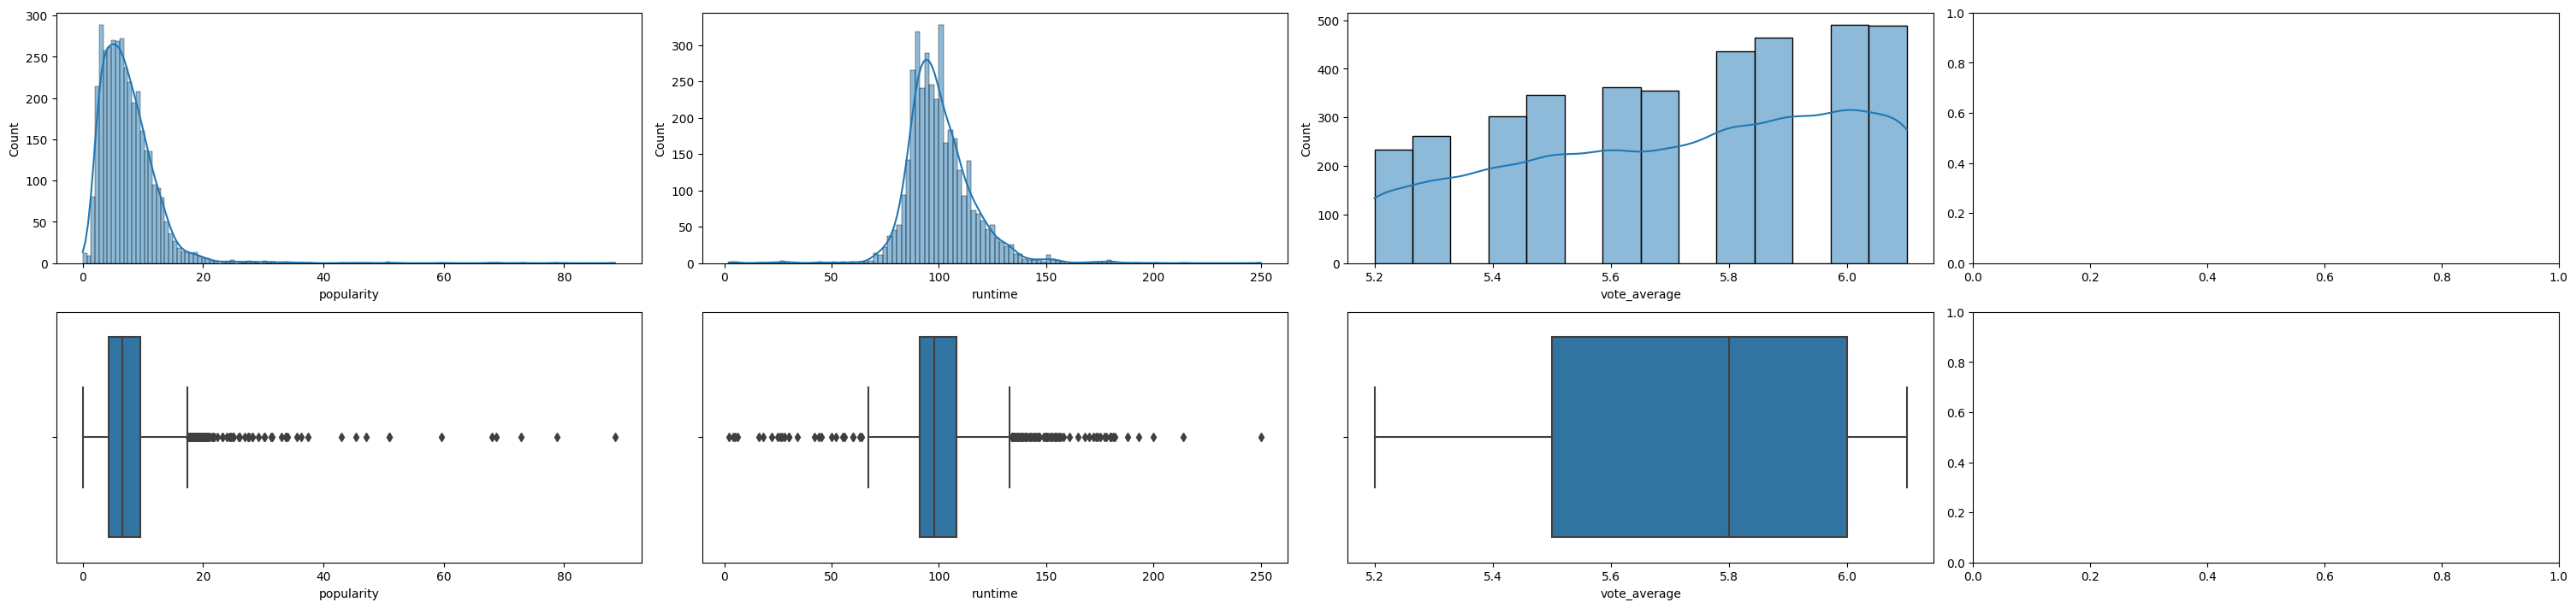

In [ ]:
plot_cluster(klaster4)

ciri-ciri klaster 4:
- rata-rata vote film di klaster ini adalah 5.5 - 6. satu tingkat diatas klaster 3. menandakan film di klaster ini tidak begitu disenangi.
- runtime pada klaster ini berada di kisaran 90-110 menit. standar untuk film.